In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("student_loan_data_new.csv")
df = df[['Date received', 'Processed Complaint']].sort_values(by='Date received')
#df.to_csv("complaint_data_new.csv", index=False)

In [3]:
df

,Date received,Processed Complaint
3715,2022-01-01,sometime apply direct loan consolidation two f...
3716,2022-01-01,steer forbearance could make student loan paym...
3717,2022-01-01,steer forbearance could make student loan paym...
7227,2022-01-01,notice university accounting service uas charg...
3718,2022-01-01,steer forbearance could make student loan paym...
...,...,...
2709,2023-12-31,upon apply idr save plan inform estimated paym...
6102,2023-12-31,apply consolidate approximately undergraduate ...
6118,2023-12-31,mohela list idr recertification date respond i...
3730,2023-12-31,im full class member lender mohela take loan f...


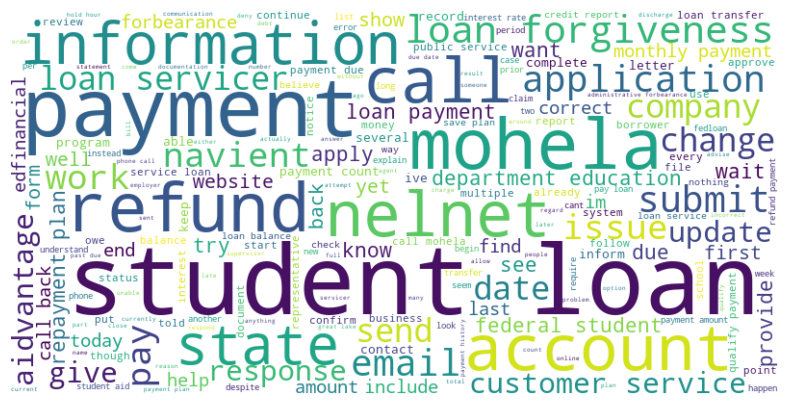

In [4]:
text = " ".join(df['Processed Complaint'].dropna())
from wordcloud import STOPWORDS

custom_stopwords = set(STOPWORDS).union({"tell", "one", "say", "year", "ask", "still", "month", "make", "need", "even", "request", "process",
                                        "never", "time", "take", "receive", "day", "go"})#"complaint", "customer", "service"})

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords, colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

result_1 = ["forbearance", "refund", "payment", "application", "account"]
result_2 = ["refund issues", "payment difficulties", "application problems"]

text_1 = " ".join(result_1)
text_2 = " ".join(result_2)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([text_1, text_2])

similarity_score = cosine_similarity(vectors[0], vectors[1])[0][0]
similarity_score

0.38087260847594373